# Cognitive Algorithms - Assignment 4 (30 points)
Cognitive Algorithms        
Summer term 2018      
Technische Universität Berlin     
Fachgebiet Maschinelles Lernen 

**Due on June 20, 2018 10am via ISIS **
                    
After completing all tasks, run the whole notebook so that the content of each cell is properly displayed. Make sure that the code was ran and the entire output (e.g. figures) is printed. Print the notebook as a PDF file and again make sure that all lines are readable - use line breaks in the Python Code '\' if necessary. Points will be deducted, if code or content is not readable!                  
           
**Upload the PDF file that contains a copy of your notebook on ISIS.** 

Group:        
Members:          

# Part 1: Theory (8 points)
---
Let $\varphi$ be a function, that maps the input data $x_1, \ldots, x_n \in \mathbb{R}^d$ to some finite or infinite dimensional $\mathbb{R}$-vector space (so-called *feature space*). The *representer theorem* states that if a function $k: \mathbb{R}^d \times \mathbb{R}^d \to \mathbb R$ is a *valid kernel*, then it defines the scalar product of the input data in that feature space
$$ k(x, x') \; = \; \langle \varphi(x), \varphi(x') \rangle \; \; \; \; \; \text{for all} \; \;  x, x' \in \mathbb{R}^d$$
The function $k$ is a *valid kernel*, iff it satisfies the *Mercer's condition*, which verifies that for any input data $x_1, \ldots, x_n \in \mathbb{R}^d$ and coefficients $c_1, \ldots, c_n \in \mathbb{R}$ the inequality 
$$ \sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k(x_i, x_j) \geq 0 $$
is satisfied.

**A) (4 points)** Show that the sum of two valid kernels $k_1$ and $k_2$ is again a valid kernel, i.e. that 
$$k(x,x') := k_1(x, x') + k_2(x,x')$$
satisfies the Mercer's condition.

**Solution**

Since $ k_1(x, x') $ and $ k_2(x, x') $ are valid kernels, it holds true that $ \sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k_1(x_i, x_j) \geq 0 $ and $ \sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k_2(x_i, x_j) \geq 0 $. 

Therefore, inserting $k(x,x') := k_1(x, x') + k_2(x,x')$ into $ \sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k(x_i, x_j)$ yields

$ \sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k(x_i, x_j)  = \sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k_1(x_i, x_j) + \sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k_2(x_i, x_j)$. 

Since both terms in the right hand side are $\geq 0$, it is clear that $ \sum_{i=1}^{n} \sum_{j=1}^n c_i c_j k(x_i, x_j) \geq 0 $, so $k(x,x')$ is a valid Kernel.

**B) (4 point)** Let $\varphi_1: \mathbb{R}^d \to \mathbb{R}^{h_1}$ and $\varphi_2: \mathbb{R}^d \to \mathbb{R}^{h_2}$ the feature mappings of $k_1$ and $k_2$. Give the feature mapping for the kernel $k$, i.e. a mapping $\varphi$ such that 
$$k(x, x') \; = \; k_1(x, x') + k_2(x,x') \; = \; \langle \varphi(x), \varphi(x') \rangle$$
and show that it fulfills the representer theorem.

**Solution**

The feature map $\varphi$ can be defined as $\varphi: \mathbb{R}^d \to \mathbb{R}^{h_1+h_2}$ by vertically stacking the feature maps $\varphi_1$ and $\varphi_2$ in a vector $\left( \varphi_1(x);\varphi_2(x) \right)$ (the semicolon here indicates vertical concatenation).

Hence, expading the inner product $\langle \varphi(x), \varphi(x') \rangle$: 



$$ \langle \varphi(x), \varphi(x') \rangle = \langle \varphi_1(x), \varphi_1(x') \rangle + \langle \varphi_2(x), \varphi_2(x') \rangle$$

and therefore $k(x, x') \; = \; k_1(x, x') + k_2(x,x')$. Again, since $k_1$ and $k_2$ are valid kernels, the resulting kernel $k$ is a valid kernel and can be expressed as a scalar product in the feature space, therefore fulfilling the representer theorem.

# Part 2: Programming (22 points)
---

The application in this assignment is the same as in assignment 4. You will predict two dimensional hand positions $y \in \mathbb{R}^2$ from electromyographic (EMG) recordings $x \in \mathbb{R}^{192}$ obtained with high-density electrode arrays on the lower arm.     
Labels are 2D positions of the hand during different hand movements.

Remember that even after 'linearizing' the EMG-hand position relationship by computing the log of the EMG features, the relationship is not exactly linear. Also we do not know the exact non-linearity; it might not be the same for all regions in EMG space and for all electrodes. So we can hope to gain something from using a non-parametric and non-linear method like kernel ridge regression.

The criterion to evaluate the model and select optimal parameters is the so called coefficient of determination, or $r^2$ index
$$ r^2 = 1-\frac{\sum_{d=1}^D \mathbb{V}(\hat{y}_d-y_d)}{\sum_{d=1}^D \mathbb{V}(y_d)} $$
where $D$ is the dimensionality of the data labels, $y$ are the true labels and $\hat{y}$ the estimated labels. This score is 1 for perfect predictions and smaller otherwise.

Use the data set ```myo_data.mat``` from the last assignment. 

In [2]:
import pylab as pl
import scipy as sp
from numpy.linalg import inv
from numpy.linalg import solve
from scipy.io import loadmat
import numpy as np
from scipy.spatial.distance import cdist
%matplotlib inline

In [14]:
def load_data(fname):
    ''' Loads EMG data from <fname> '''
    # load the data
    data = loadmat(fname)
    # extract data for training
    X_train = data['training_data']
    X_train = sp.log(X_train)
    X_train = X_train[:, :1000]
    # extract hand positions
    Y_train = data['training_labels']
    Y_train = Y_train[:, :1000]
    return X_train,Y_train

def GaussianKernel(X1, X2, kwidth):
    ''' Compute Gaussian Kernel 
    Input: X1    - DxN1 array of N1 data points with D features 
           X2    - DxN2 array of N2 data points with D features 
           kwidth - Kernel width
    Output K     - N1 x N2 Kernel matrix
    '''
    assert(X1.shape[0] == X2.shape[0])
    K = cdist(X1.T, X2.T, 'euclidean')
    K = np.exp(-(K ** 2) / (2. * kwidth ** 2))
    return K

def train_krr(X_train, Y_train,kwidth,llambda):
    ''' Trains kernel ridge regression (krr)
    Input:       X_train  -  DxN array of N data points with D features
                 Y        -  D2xN array of length N with D2 multiple labels
                 kwdith   -  kernel width
                 llambda    -  regularization parameter
    Output:      alphas   -  NxD2 array, weighting of training data used for apply_krr                     
    '''
    # your code here
    D,N = X_train.shape
    K = GaussianKernel(X_train,X_train,kwidth)
    return inv(K + llambda*np.eye(N)).dot(np.transpose(Y_train))
    
def apply_krr(alphas, X_train, X_test, kwidth):
    ''' Applys kernel ridge regression (krr)
    Input:      alphas      -  NtrxD2 array trained in train_krr      
                X_train     -  DxNtr array of Ntr train data points with D features
                X_test      -  DxNte array of Nte test data points with D features
                kwidht      -  Kernel width             
    Output:     Y_test      -  D2xNte array
    '''
    # your code here
    K = GaussianKernel(X_test,X_train,kwidth)
    return np.transpose(K.dot(alphas))

def train_ols(X_train, Y_train):
    ''' Trains ordinary least squares (ols) regression 
    Input:       X_train  -  DxN array of N data points with D features
                 Y        -  D2xN array of length N with D2 multiple labels
    Output:      W        -  DxD2 array, linear mapping used to estimate labels 
                             with sp.dot(W.T, X)                      
    '''
    #W = sp.dot(inv(sp.dot(X_train,X_train.T)),sp.dot(X_train,Y_train.T))
    W = solve(sp.dot(X_train,X_train.T),sp.dot(X_train,Y_train.T))
    return W
    
def apply_ols(W, X_test):
    ''' Applys ordinary least squares (ols) regression 
    Input:       X_test    -  DxN array of N data points with D features
                 W        -  DxD2 array, linear mapping used to estimate labels 
                             trained with train_ols                   
    Output:     Y_test    -  D2xN array
    '''
    Y_test = sp.dot(W.T, X_test)
    return Y_test

def test_handpositions():
    X,Y = load_data('myo_data.mat')
    print (crossvalidate_krr(X,Y))

def test_sine_toydata(kwidth = 1, llambda = 1):
    #Data generation
    X_train = sp.arange(0,10,.01)
    X_train = X_train[None,:]
    Y_train = sp.sin(X_train) + sp.random.normal(0,.5,X_train.shape)
    #Linear Regression 
    w_est = train_ols(X_train, Y_train) 
    Y_est_lin = apply_ols(w_est,X_train)
    #Kernel Ridge Regression
    alphas = train_krr(X_train,Y_train,kwidth,llambda)
    Y_est_krr = apply_krr(alphas,X_train,X_train,kwidth)
    
    #Plot result
    pl.figure()
    pl.plot(X_train.T, Y_train.T, '+k', label = 'Train Data')
    pl.plot(X_train.T, Y_est_lin.T, '-.', linewidth = 2, label = 'OLS')
    pl.plot(X_train.T, Y_est_krr.T,  'r', linewidth = 2, label = 'KRR')
    pl.xlabel('x')
    pl.ylabel('y')
    pl.title(r'$\lambda$ = ' + str(llambda) + '   $\sigma$ = ' + str(kwidth))
    pl.legend(loc = 'lower right')
    
      
def crossvalidate_krr(X,Y,f=5, kwidths=10.0**np.array([0, 1, 2]), llambdas=10.0**np.array([-4, -2, 0])):
    ''' 
    Test generalization performance of kernel ridge regression with gaussian kernel
    Input:      X   data (dims-by-samples)
                Y   labels (dims2-by-samples)
                f   number of cross-validation folds
                kwidths width of gaussian kernel function 
                llambdas regularizer (height of ridge on kernel matrix)
    '''
    #N = f*(X.shape[-1]/f)
    #idx = sp.reshape(sp.random.permutation(sp.arange(N)),(f,N/f))
    N = f*(X.shape[-1]//f)
    idx = sp.reshape(sp.arange(N),(f,N//f))
    r2_outer = sp.zeros((f))
    r2_linear = sp.zeros((f))
    r2_inner = sp.zeros((f-1,kwidths.shape[-1],llambdas.shape[-1]))
    
    # to outer cross-validation (model evaluation)
    for ofold in range(f):
        # split in training and test (outer fold)
        otestidx = sp.zeros((f),dtype=bool)
        otestidx[ofold] = 1
        otest = idx[otestidx,:].flatten()
        otrain = idx[~otestidx,:]
        
        # inner cross-validation (model selection)
        for ifold in range(f-1):
            # split in training and test (inner fold)
            itestidx = sp.zeros((f-1),dtype=bool)
            itestidx[ifold] = 1
            itest = otrain[itestidx,:].flatten()
            itrain = otrain[~itestidx,:].flatten()
            
            # do inner cross-validation (model selection)
            for illambda in range(llambdas.shape[-1]):
                for ikwidth in range(kwidths.shape[-1]):
                    #compute kernel for all data points
                    alphas = train_krr(X[:,itrain],Y[:,itrain],kwidths[ikwidth],llambdas[illambda])
                    yhat = apply_krr(alphas, X[:,itrain], X[:,itest],kwidths[ikwidth])
                    r2_inner[ifold,ikwidth,illambda] = compute_rsquare(yhat,Y[:,itest])

        #train again using optimal parameters
        r2_across_folds = r2_inner.mean(axis=0)
        optkwidthidx, optllambdaidx = np.unravel_index(r2_across_folds.flatten().argmax(),r2_across_folds.shape)
        #evaluate model on outer test fold
        alphas = train_krr(X[:,otrain.flatten()],Y[:,otrain.flatten()], kwidths[optkwidthidx],llambdas[optllambdaidx])
        yhat = apply_krr(alphas, X[:,otrain.flatten()],X[:,otest], kwidths[optkwidthidx])
        r2_outer[ofold] = compute_rsquare(yhat,Y[:,otest])

        # for comparison: predict with linear model
        w_est = train_ols(X[:,otrain.flatten()], Y[:,otrain.flatten()]) 
        y_est_lin = apply_ols(w_est,X[:,otest])
        r2_linear[ofold] = compute_rsquare(y_est_lin,Y[:,otest])
        
        print('Fold %d'%ofold + ' best kernel width %f'%kwidths[optkwidthidx] +\
        ' best regularizer %f'%llambdas[optllambdaidx] + \
        ' rsquare %f'%r2_outer[ofold] + \
        ' rsquare linear %f'%r2_linear[ofold])
    pl.figure()
    pl.boxplot(sp.vstack((r2_outer,r2_linear)).T)
    pl.ylabel('$r^2$')
    pl.xticks((1,2),('KRR','Lin'))
    #pl.savefig('krr_vs_lin_comparison.pdf')
    return r2_outer,r2_linear
    
def compute_rsquare(yhat,Y):
    '''compute coefficient of determination'''
    return 1 - (sp.var((yhat - Y),axis=1).sum()/sp.var(Y,axis=1).sum())

**A) (6 points)** Implement Kernel Ridge Regression (KRR) by completing the function stubs  ```krr_train``` and  ```krr_apply```. 
We use the notation from assignment 4, 
$$ X_{\text{train}} \in \mathbb{R}^{D_X \times N_{tr}}, \;  Y_{\text{train}} \in \mathbb{R}^{D_Y \times N_{tr}}, \; X_{\text{test}} \in \mathbb{R}^{D_X \times N_{te}} $$
In ```krr_train```, you estimate a linear combination of the input vectors $\alpha$, 
$$\alpha = (K + \lambda I)^{-1}Y_{\text{train}}^T$$
where $\lambda$ is the regularization parameter and $K$ is the $N_{tr} \times N_{tr}$ Gaussian Kernel matrix with Kernel width $\sigma$, $K_{ij} =  \exp\left( - \frac{\| X_{\text{train}}^i - X_{\text{train}}^j\|^2}{\sigma^2} \right)$. You can compute $K$ with the provided function ```GaussianKernel```.

The function ```krr_apply``` than uses the weights $\alpha$ to predict the (unknown) hand positions of new test data $X_{\text{test}}$
$$ Y_{\text{test}} = (\mathbf{k} \alpha)^T.$$
where $\mathbf k$ is the $N_{\text{test}} \times N_{\text{train}}$ matrix $\mathbf{k}_{ij} =   \exp\left( - \frac{\| X_{\text{test}}^i - X_{\text{train}}^j\|^2}{\sigma^2}\right) $.    

The function  ```test_sine_toydata``` helps you to debug your code. It generates toy data that follows a sine function, $x_i \in \{0, 0.01, 0.02, \ldots, 10\}, y_i = \sin(x_i) + \epsilon, \epsilon \sim \mathcal{N}(0, 0.5)$. The result of KRR should resemble the sine function.

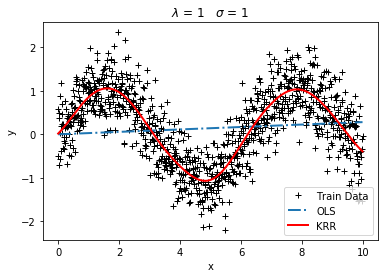

In [9]:
test_sine_toydata()

**B) (5 points)** We want to analyse how the Kernel Ridge solution depends on its hyperparameters, the kernel width $\sigma$ and  the regularization parameter $\lambda$. 
- Call the function  ```test_sine_toydata```  with $\lambda$ = 1 for three different Kernel widths, $\sigma = \{ 0.1, 1, 10\}$. How does the Kernel width affect the solution? Explain the observed behaviour.  
- Call the function  ```test_sine_toydata```  with $\sigma$ = 1 for three different regularization parameters, $\lambda = \{ 10^{-10}, 1, 500\}$. How does the regularization parameter affect the solution? Explain the observed behaviour.  

**Solution**

- The Kernel width can be interpreted as a window containing training points considered when making a prediction. With a small $\sigma$ the number of training examples considered around the test point is small, so the prediction is likely to pose a local behavior, being possible to end up with overfitting. When $\sigma$ is increased, more training points are used for the prediction and therefore a smoother behaviour is expected. If $\sigma$ is too large, too many points will be considered for the prediction and the result is likely to lack complexity. This is the behavior observed in the following figures.

- The regularization parameter $\lambda$ determines the complexity of the solution by enforcing the model parameters to take relatively small values. For small $\lambda$, the regularization is negligible and we can run into overfitting if the model allows it. For moderate $\lambda$, the model parameters are significantly affected by the regularization and the solution smoothly reproduces the behavior of the data. For high values of $\lambda$ the model parameters are forced to take relatively small values, and this might cause lack of complexity for our model. This behavior can be found in the following figures.

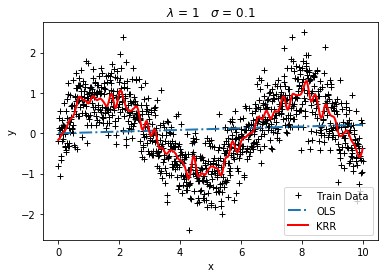

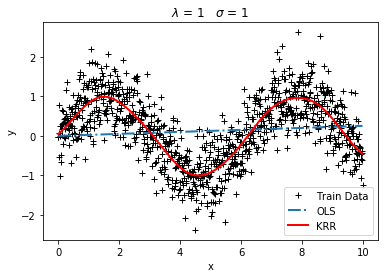

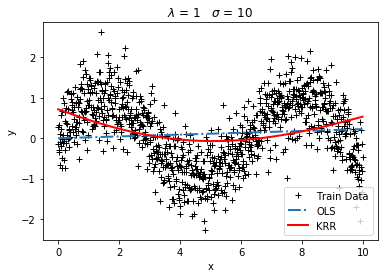

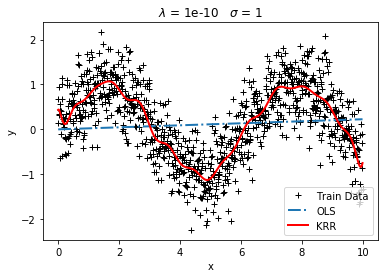

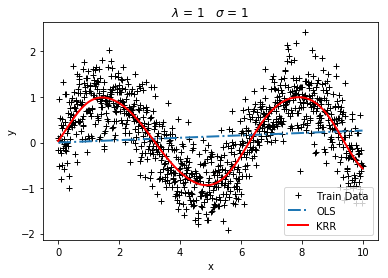

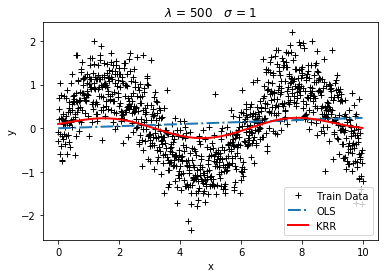

In [5]:
test_sine_toydata(kwidth = 0.1, llambda = 1)
test_sine_toydata(kwidth = 1, llambda = 1)
test_sine_toydata(kwidth = 10, llambda = 1)
test_sine_toydata(kwidth = 1, llambda = 1e-10)
test_sine_toydata(kwidth = 1, llambda = 1)
test_sine_toydata(kwidth = 1, llambda = 500)

**C) (4 points)**  Briefly explain in your own words how nested-crossvalidation is done. To do so, you can examine the function ```crossvalidate_krr```.Explain briefly how $\lambda$ and $\sigma$ are chosen within the function. 

**Solution**

(original)

As in normal crossvalidation the data $D$ is splitted into disjoint folds. For each outer fold the rest of the data $D-outer fold$ is considered for model selection and evaluation. Model selection is done by iterating through the different model parameters and through $D-outer fold$. For each set of folds the model is trained using the different parameters, and evaluated in a fold belonging to $D-outer fold$. The values of the parameters which yield maximum performance are chosen and the model is trained and evaluated in the original folds in the same way as regular crossvalidation.

(proposed)

NCV first splits the dataset $D$ in subsets $D_i$. On each of these subsets, normal CV is performed (assuming a single nesting). This means each subest $D_i$ is split into smaller subsets $D_{ij}$. Then, iterating over $j$, a model is trained with data from $D_{ij}$ for each possible combination of paramters and then evaluated on the set $D_i/D_{ij}$. The evaluation score is then averaged over all $j$ which yields an average score for each parameter configuration. From this, the best configuration is chosen and a model is trained on $D_i$ using this configuration and validated on $D/D_i$. The outer loop does not do any parameter selection and only acts as a validator for the selection method. If the model paramters are not stable over iterations $i$ this can indicate a bad model fitting procedure in the inner loop or insufficient training data.


**D) (6 points)** Predict two dimensional hand positions with Kernel Ridge Regression by calling the function ``` test_handpositions```. It shows a boxplot for the linear regression and the Kernel Ridge Regression.  What does a boxplot show? (check the help function in python or the wikipedia article). Do we gain something from Kernel Ridge Regression as compared to simple linear regression? 

**Solution**

Per definition in their decomentation, the boxplot from [matpplotlib] works as follows: The box extends from the lower (Q1) to the upper (Q3) quartile. The whiskers (by default) extend to Q1 - 1.5 * IQR and Q3 + 1.5 * IQR respectively (IQR = Q3 - Q1). Any other datapoints are plotted seperatly (here as little circles) and can be considered outliers. The mean is plotted inside the box as an orange line.

In our case (limited data, low number of iterations) the boxplot shows a smaller variance for the KRR with the same mean. This may indicate a more stable model, even though it shows a nasty outlier. Increasing the number of loaded data points to 2000 however, has KRR perform very stable across all iterations without any noticable fluctuation in the parameter configuration, while consistently outperforming the linear regression. This suggests that the plot we see is not indicative of the KRR procedure in general. In any case we have a lower variance in performance compared to the linear regression but considering there are only 5 iterations, the Quartiles are not large enough themselves to support a definite proposition.

Fold 0 best kernel width 100.000000 best regularizer 0.000100 rsquare 0.736898 rsquare linear 0.661384
Fold 1 best kernel width 100.000000 best regularizer 0.010000 rsquare 0.656649 rsquare linear 0.685375
Fold 2 best kernel width 100.000000 best regularizer 0.000100 rsquare 0.659510 rsquare linear 0.616657
Fold 3 best kernel width 10.000000 best regularizer 1.000000 rsquare 0.680160 rsquare linear 0.804902
Fold 4 best kernel width 100.000000 best regularizer 0.000100 rsquare 0.863778 rsquare linear 0.867395
(array([0.73689792, 0.65664944, 0.6595102 , 0.68015994, 0.86377778]), array([0.66138387, 0.68537513, 0.6166573 , 0.8049023 , 0.86739507]))
None


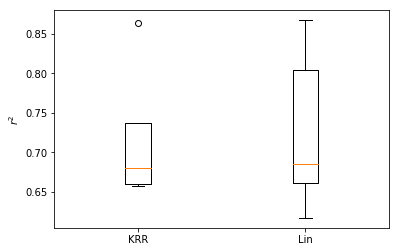

In [15]:
print (test_handpositions())

**E) (1 point)** In the last task, we have applied the function ```test_handpositions``` only to the first $1000$ data points out of the $10255$ available data points. Why did we do so in this exercice?

**Solution**

Training with a significantly higher number of data points increases computation time quadratically as K is an $N\times N$ matrix. This can lead to infeasible computation costs.